# Analyse Factorielle des correspondances

In [1]:
# Chargement des données
import pandas as pd

donnee = pd.read_csv('femme_travail.csv',delimiter=";",encoding =  "cp1252",
                     index_col = 0,usecols=[0,1,2,3])
display(donnee)

,rester au foyer,trav. à mi-temps,trav. plein temps
2 conj. tr. également,13,142,106
trav. mari + absorbant,30,408,117
seul le mari trav.,241,573,94


In [2]:
# Dimensions du tableau
n = donnee.shape[0]   # Nombre de lignes
p = donnee.shape[1]   # Nombre de colonnes
print(f'n = {n} et p = {p}.')

n = 3 et p = 3.


In [3]:
# copie des données
df = donnee.copy()
df.loc['Somme'] = df.sum(axis=0)
df.loc[:,'Somme'] = df.sum(axis=1)
# Affichage
display(df)

,rester au foyer,trav. à mi-temps,trav. plein temps,Somme
2 conj. tr. également,13,142,106,261
trav. mari + absorbant,30,408,117,555
seul le mari trav.,241,573,94,908
Somme,284,1123,317,1724


In [4]:
# Calcul des totaux en ligne
rowsum = donnee.sum(axis =1)
# Calcul des totaux en colonne
colsum = donnee.sum(axis = 0)

In [5]:
# Probabilité conjointe
probconj=donnee.apply(lambda x : x/donnee.sum().sum())
display(probconj)

,rester au foyer,trav. à mi-temps,trav. plein temps
2 conj. tr. également,0.007541,0.082367,0.061485
trav. mari + absorbant,0.017401,0.236659,0.067865
seul le mari trav.,0.139791,0.332367,0.054524


In [6]:
# Somme
print(f'Somme des probabilités : {probconj.sum().sum()}')

Somme des probabilités : 1.0


In [7]:
# copie des données
df2 = probconj.copy()
df2.loc['Somme'] = df2.sum(axis=0)
df2.loc[:,'Somme'] = df2.sum(axis=1)
# Affichage
display(df2)

,rester au foyer,trav. à mi-temps,trav. plein temps,Somme
2 conj. tr. également,0.007541,0.082367,0.061485,0.151392
trav. mari + absorbant,0.017401,0.236659,0.067865,0.321926
seul le mari trav.,0.139791,0.332367,0.054524,0.526682
Somme,0.164733,0.651392,0.183875,1.000000


In [8]:
# Marge colonne (probabilité marginale)
rowprob = probconj.sum(axis = 1)
display(rowprob)

2 conj. tr. également     0.151392
trav. mari + absorbant    0.321926
seul le mari trav.        0.526682
dtype: float64

In [9]:
# Marge ligne (probabilité marginale)
colprob = probconj.sum(axis = 0)
display(colprob)

rester au foyer      0.164733
trav. à mi-temps     0.651392
trav. plein temps    0.183875
dtype: float64

In [10]:
# Effectif total
neff = donnee.values.sum()
# Effectif théorique
import numpy as np
efftheorik = pd.DataFrame(np.zeros((n,p),dtype=float),index = donnee.index,
                           columns = donnee.columns)
for i in range(n):
    for j in range(p):
        efftheorik.values[i,j] = (rowsum[i]*colsum[j])/neff
# copie des données
df3 = efftheorik.copy()
df3.loc['Somme'] = df3.sum(axis=0)
df3.loc[:,'Somme'] = df3.sum(axis=1)
# Affichage
display(df3.round(2))

,rester au foyer,trav. à mi-temps,trav. plein temps,Somme
2 conj. tr. également,43.00,170.01,47.99,261.0
trav. mari + absorbant,91.43,361.52,102.05,555.0
seul le mari trav.,149.58,591.46,166.96,908.0
Somme,284.00,1123.00,317.00,1724.0


In [11]:
# Statistique du Khi-deux
khi2 = np.sum(((donnee.values - efftheorik.values)**2)/efftheorik.values)
print("Khi2 vaut %.2f." %(khi2))

Khi2 vaut 233.43.


In [12]:
# Degré de liberté
ddl = (n - 1)*(p - 1)
print("degré de liberté : %.i" %(ddl))
# P-value du test
from scipy import stats as stat
pvalue = 1 - stat.chi2.cdf(khi2,df=ddl)
print('pvalue : %.4f'%(pvalue))

degré de liberté : 4
pvalue : 0.0000


In [13]:
# Autre façon
from scipy import stats

scipy_stats = stats.chi2_contingency(donnee)
khistats = pd.DataFrame(scipy_stats[:3],columns=['valeur'],
                       index = ['chisq','p.value','ddl'])
display(khistats.round(2))

,valeur
chisq,233.43
p.value,0.00
ddl,4.00


### Comment l'AFC appréhende l'écart à l'indépendance?

#### Profils lignes

In [14]:
# Profils lignes
import numpy as np
rowprof = donnee.apply(lambda x:x/np.sum(x), axis=1)
# Copie des données
df4 = rowprof.copy()
df4['Profil moyen'] = df4.sum(axis=1)
display(df4.round(3))

,rester au foyer,trav. à mi-temps,trav. plein temps,Profil moyen
2 conj. tr. également,0.050,0.544,0.406,1.0
trav. mari + absorbant,0.054,0.735,0.211,1.0
seul le mari trav.,0.265,0.631,0.104,1.0


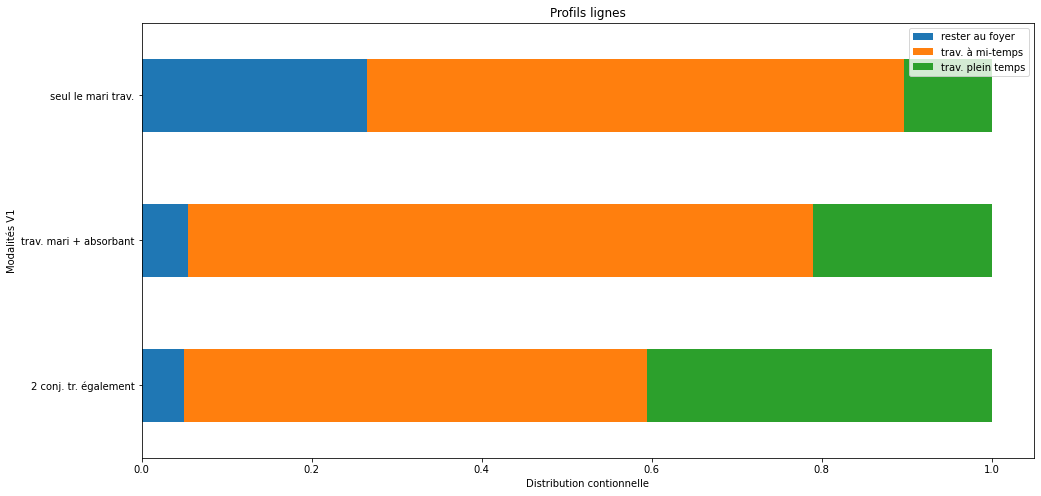

In [15]:
# Graphique
from matplotlib import pyplot as plt
rowprof.plot.barh(stacked=True, figsize=(16,8))
plt.ylabel('Modalités V1')
plt.xlabel('Distribution contionnelle')
plt.title('Profils lignes')
plt.show()

In [16]:
# Profil ligne moyen
rowmean = colsum/colsum.sum()
# Copie des données
df5 = rowprof.copy()
df5.loc['Profil moyen',:] = rowmean
df5.loc[:,'Somme'] = df5.sum(axis=1)
display(df5.round(3))

,rester au foyer,trav. à mi-temps,trav. plein temps,Somme
2 conj. tr. également,0.050,0.544,0.406,1.0
trav. mari + absorbant,0.054,0.735,0.211,1.0
seul le mari trav.,0.265,0.631,0.104,1.0
Profil moyen,0.165,0.651,0.184,1.0


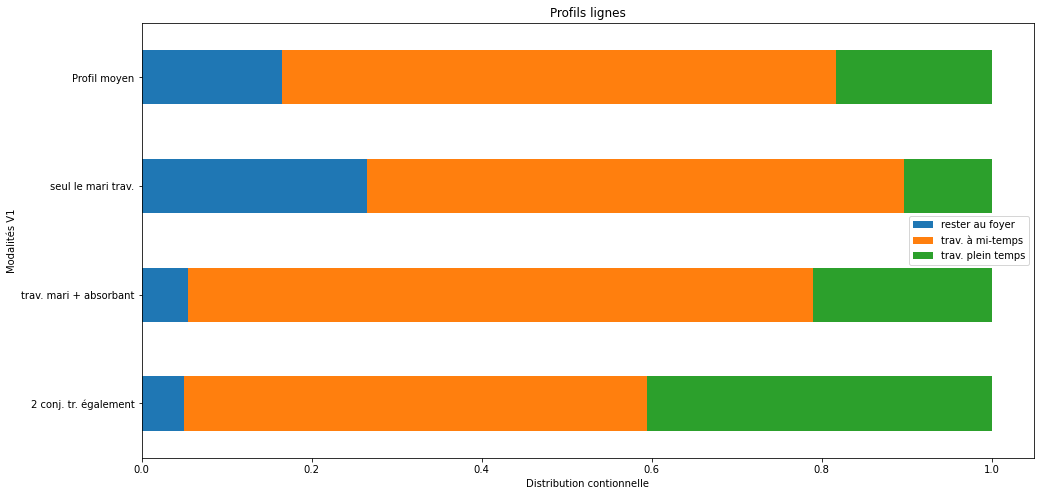

In [17]:
# Graphique
from matplotlib import pyplot as plt
df5.iloc[:,[0,1,2]].plot.barh(stacked=True, figsize=(16,8))
plt.ylabel('Modalités V1')
plt.xlabel('Distribution contionnelle')
plt.title('Profils lignes')
plt.show()

#### Analyse par colonnes

In [18]:
## Profils colonnes
import numpy as np
colprof = donnee.apply(lambda x:x/np.sum(x), axis=0)
somme = pd.DataFrame(colprof.sum(axis = 0).values.reshape(1,p),
                     index = ["Somme"], 
                     columns = donnee.columns)
colprofdf = pd.concat([colprof, somme], axis = 0)
display(colprofdf.round(3))

,rester au foyer,trav. à mi-temps,trav. plein temps
2 conj. tr. également,0.046,0.126,0.334
trav. mari + absorbant,0.106,0.363,0.369
seul le mari trav.,0.849,0.510,0.297
Somme,1.000,1.000,1.000


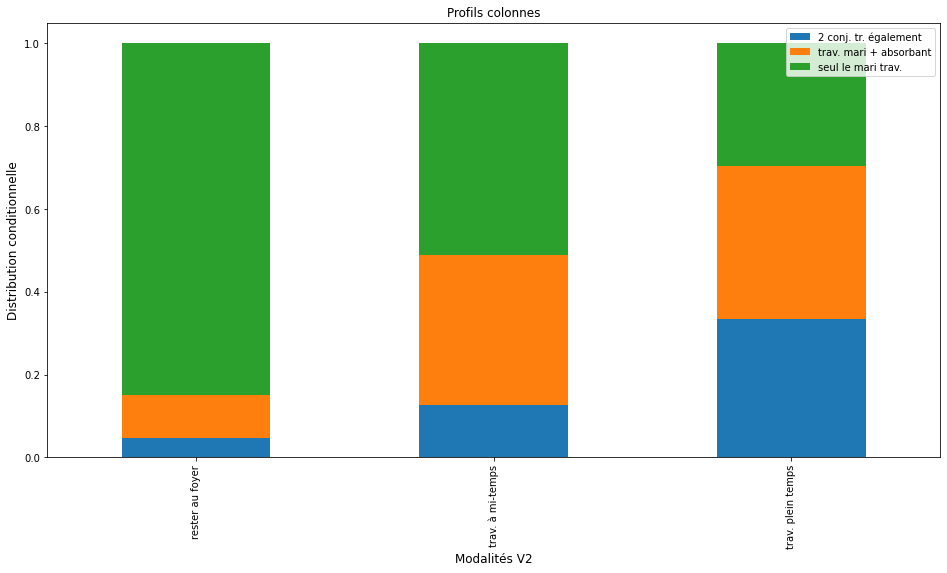

In [19]:
# Graphique
colprof.transpose().plot(kind = "bar",stacked=True, figsize=(16,8))
plt.ylabel('Distribution conditionnelle',fontsize=12)
plt.xlabel('Modalités V2', fontsize=12)
plt.title('Profils colonnes',fontsize=12)
plt.show()

In [20]:
# Profil ligne moyen
colmean = rowsum/rowsum.sum()
colmeandf = pd.DataFrame(colmean.values.reshape(n,1),
                         columns = ["Profil moyen"],index = donnee.index)
coldata = pd.concat([colprof, colmeandf], axis = 1)
coldata.loc['Somme',:] = coldata.sum(axis=0)
display(coldata.round(3))

,rester au foyer,trav. à mi-temps,trav. plein temps,Profil moyen
2 conj. tr. également,0.046,0.126,0.334,0.151
trav. mari + absorbant,0.106,0.363,0.369,0.322
seul le mari trav.,0.849,0.510,0.297,0.527
Somme,1.000,1.000,1.000,1.000


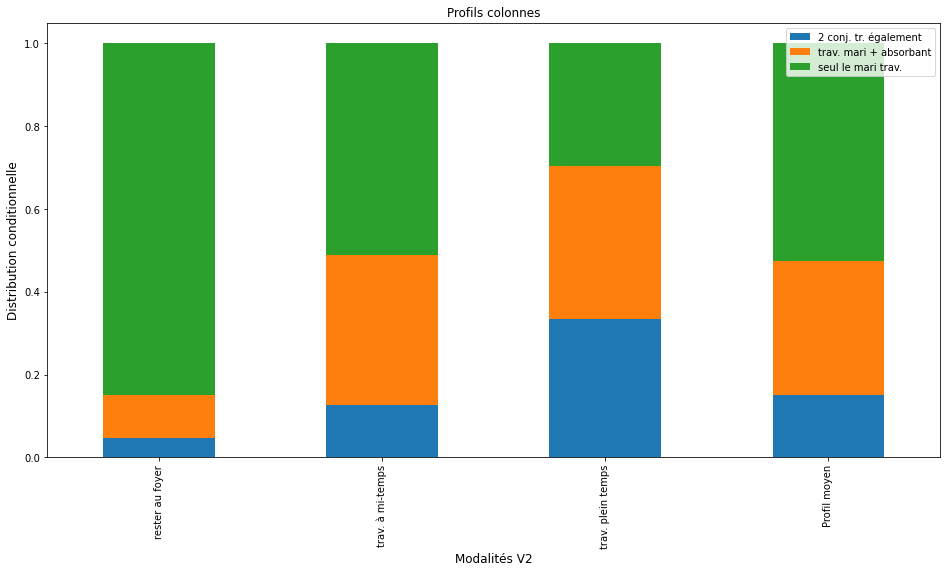

In [21]:
# Graphique
coldata.transpose().iloc[:,[0,1,2]].plot(kind = "bar",stacked=True, figsize=(16,8))
plt.ylabel('Distribution conditionnelle',fontsize=12)
plt.xlabel('Modalités V2', fontsize=12)
plt.title('Profils colonnes',fontsize=12)
plt.show()

## Le Nuage et leur ajustement

### Le nuage des profils lignes

In [22]:
# Distance entre paires de modalités lignes
rowdist = np.zeros(shape = (rowprof.shape[0], rowprof.shape[0]))
value = rowprof.values
for i in range(rowprof.shape[0]-1):
    for j in range(i+1, rowprof.shape[0]):
        rowdist[i,j] = np.sum((value[i,:]-value[j,:])**2/rowmean.values)
# Affichage
rowdistdf = pd.DataFrame(rowdist,index = donnee.index,
                        columns = donnee.index)
display(rowdistdf.round(3))

,2 conj. tr. également,trav. mari + absorbant,seul le mari trav.
2 conj. tr. également,0.0,0.264,0.792
trav. mari + absorbant,0.0,0.000,0.350
seul le mari trav.,0.0,0.000,0.000


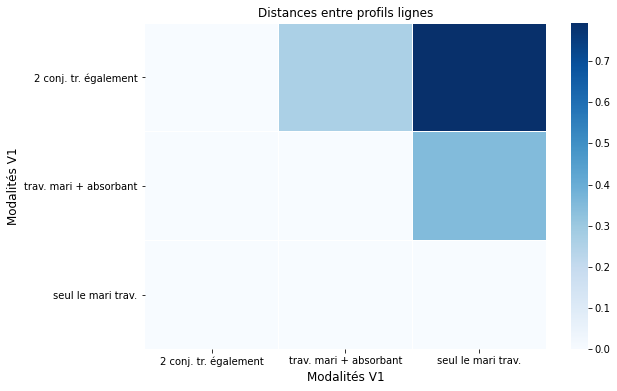

In [23]:
# Graphique
import seaborn as sns
plt.figure(figsize = (9,6))
sns.heatmap(rowdistdf, vmin = 0, vmax = np.max(rowdist),
           linewidth = 0.1, cmap = "Blues", xticklabels = donnee.index,
           yticklabels = donnee.index)
plt.title('Distances entre profils lignes',fontsize=12)
plt.xlabel('Modalités V1',fontsize=12)
plt.ylabel('Modalités V1',fontsize=12)
plt.show()

In [24]:
# Distance à l'origine
rowdisto = rowprof.apply(lambda x :np.sum((x - rowmean.values)**2/rowmean.values),
                         axis = 1)
display(rowdisto.round(3))

2 conj. tr. également     0.367
trav. mari + absorbant    0.089
seul le mari trav.        0.097
dtype: float64

In [25]:
# Poids des lignes
rowweight = rowsum.values/rowsum.values.sum()
# Inertie des lignes
rowinertie = rowdisto*rowweight
# Affichage
rowinfos = pd.DataFrame(np.transpose([rowdisto, rowweight, rowinertie]),
                        columns = ["Disto2", "poids", "Inertie"],
                        index = donnee.index)
display(rowinfos.round(4))

,Disto2,poids,Inertie
2 conj. tr. également,0.3665,0.1514,0.0555
trav. mari + absorbant,0.0891,0.3219,0.0287
seul le mari trav.,0.0973,0.5267,0.0512


In [26]:
# Inertie total
inertietot = np.sum(rowinertie)
print("Inertie totale : %.4f" %(inertietot))

Inertie totale : 0.1354


### Le nuage des profils colonnes

In [27]:
# Distance entre paires de modalités lignes
coldist = np.zeros(shape = (colprof.shape[0], colprof.shape[0]))
value = colprof.values.transpose()
for i in range(colprof.shape[0]-1):
    for j in range(i+1, colprof.shape[0]):
        coldist[i,j] = np.sum((value[i,:]-value[j,:])**2/colmean.values)
# Affichage
coldistdf = pd.DataFrame(coldist, index = donnee.columns,
                        columns = donnee.columns)
display(coldistdf.round(4))

,rester au foyer,trav. à mi-temps,trav. plein temps
rester au foyer,0.0,0.4666,1.3445
trav. à mi-temps,0.0,0.0000,0.3724
trav. plein temps,0.0,0.0000,0.0000


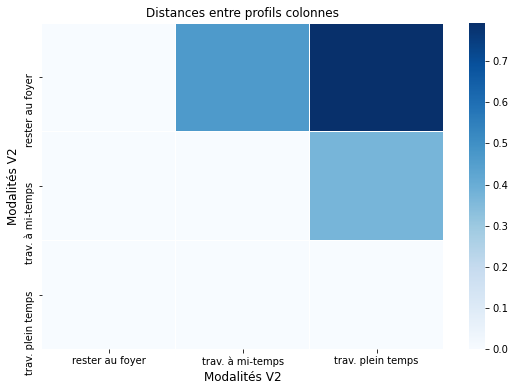

In [28]:
# Graphique
plt.figure(figsize = (9,6))
sns.heatmap(coldistdf, vmin = 0, vmax = np.max(rowdist),
           linewidth = 0.1, cmap = "Blues", xticklabels = donnee.columns,
           yticklabels = donnee.columns)
plt.title('Distances entre profils colonnes',fontsize=12)
plt.xlabel('Modalités V2',fontsize=12)
plt.ylabel('Modalités V2',fontsize=12)
plt.show()

In [29]:
# Distance à l'origine
mean = colmean.values
coldisto = colprof.transpose().apply(lambda x : np.sum((x-mean)**2/mean),
                                     axis = 1)
display(coldisto.round(4))

rester au foyer      0.4158
trav. à mi-temps     0.0099
trav. plein temps    0.3287
dtype: float64

In [30]:
# Poids des lignes
colweight = colsum.values/colsum.values.sum()
# Inertie des lignes
colinertie = coldisto*colweight
# Affichage
colinfos = pd.DataFrame(np.transpose([coldisto, colweight, colinertie]),
                       columns = ["Disto2", "poids", "Inertie"],
                       index = donnee.columns)
display(colinfos.round(4))

,Disto2,poids,Inertie
rester au foyer,0.4158,0.1647,0.0685
trav. à mi-temps,0.0099,0.6514,0.0065
trav. plein temps,0.3287,0.1839,0.0604


In [31]:
# Inertie total
inertietot = np.sum(colinertie)
print("Inertie totale : %.4f" %(inertietot))

Inertie totale : 0.1354


### Représentation du nuage des lignes

In [32]:
# Matrice des résidus standardisés
resStd = (donnee.values - efftheorik)/np.sqrt(efftheorik)
display(resStd.round(4))

,rester au foyer,trav. à mi-temps,trav. plein temps
2 conj. tr. également,-4.5745,-2.1484,8.3736
trav. mari + absorbant,-6.4242,2.4444,1.4799
seul le mari trav.,7.4751,-0.7592,-5.6464


In [33]:
# Matrice M
M = resStd/np.sqrt(neff)
display(M.round(4))

,rester au foyer,trav. à mi-temps,trav. plein temps
2 conj. tr. également,-0.1102,-0.0517,0.2017
trav. mari + absorbant,-0.1547,0.0589,0.0356
seul le mari trav.,0.1800,-0.0183,-0.1360


In [34]:
# Décomposition en valeurs singulières (svd)
U,delta,V = np.linalg.svd(M)

In [35]:
# delta
print(delta)

[3.41818701e-01 1.36236740e-01 1.72095781e-17]


In [36]:
# Valeurs singulières au carré
np.set_printoptions(precision=3,suppress = True)
eigen = delta**2
print(eigen)

[0.117 0.019 0.   ]


In [37]:
# Nombre d'axes maximales
fmax = min(n-1, p-1)
# Valeur propre
eigenvalue = eigen[:fmax]
percent = np.array([100*x/sum(eigenvalue) for x in eigenvalue])
cumpercent = np.cumsum(percent)
# dataframe
index = ['Dim.{}'.format(x+1) for x in range(fmax)]
columns = ['valeur propre','pourcentage d\'inertie',
           'pourcentage d\'inertie cumulée']
Eigen = pd.DataFrame(np.transpose([eigenvalue,percent,cumpercent]),
                     index=index,columns = columns)
Eigen.index.name = 'Dimension'
# Affichage
display(Eigen.round(3))

,valeur propre,pourcentage d'inertie,pourcentage d'inertie cumulée
Dimension,,,
Dim.1,0.117,86.292,86.292
Dim.2,0.019,13.708,100.000


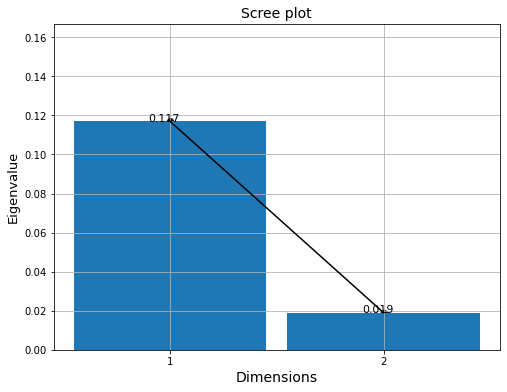

In [38]:
# Visualisation des valeurs propres
def screeplot(data,choice=None,figsize=None):
    #
    p = data.shape[0]
    fig,axes = plt.subplots(figsize = figsize); axes.grid()
    axes.set_xlabel('Dimensions',fontsize=14)
    axes.set_title('Scree plot',fontsize=14)
    axes.set_xticks([x for x in range(1,p+1)])
    if choice is None or choice=='scree plot':
        eigen = data.iloc[:,0].round(3)
        ylim = np.max(eigen)+.05
        axes.set_ylim(0,ylim)
        axes.bar(np.arange(1,p+1),eigen.values,width=0.9)
        axes.plot(np.arange(1,p+1),eigen.values,c="black")
        axes.set_ylabel('Eigenvalue',fontsize=13)
        ## Add text
        for i in range(p):
            axes.scatter(i+1,eigen.values[i],color='black',alpha=1)
            axes.text(i+0.9,eigen.values[i],str(eigen.values[i]),
                     color = 'black',fontsize=11)
    elif choice == "percentage":
        percent = data.iloc[:,1].round()
        axes.set_ylim(0,100)
        axes.bar(np.arange(1,p+1),percent.values,width=0.9)
        axes.plot(np.arange(1,p+1),percent.values,c="black")
        axes.set_ylabel('Percentage of variance',fontsize=13)
        ## Add text
        for i in range(p):
            axes.scatter(i+1,percent.values[i],color='black',alpha=1)
            axes.text(i+0.9,percent.values[i],f'{percent.values[i]}%',
                     color = 'black',fontweight='bold',fontsize=12)
    elif choice == "cumulative":
        cumul = data.iloc[:,2].round()
        axes.set_ylim(0,105)
        axes.bar(np.arange(1,p+1),cumul.values,width=0.9)
        axes.set_ylabel('Cumulative percentage of variance',fontsize=13)
    plt.show()
# Affichage
screeplot(data=Eigen,figsize=(8,6))

In [39]:
# Khi-deux
chi2 = neff*Eigen.iloc[:,0].sum()
print("Khi - deux vaut %.2f" %(chi2))

Khi - deux vaut 233.43


### Coordonnées des profils lignes

In [40]:
# Coordonnées des profils lignes
coord = pd.DataFrame(U[:,:fmax]*delta[:fmax],index = donnee.index,
                     columns = index)
rowcoord = coord.apply(lambda x : x/np.sqrt(rowweight), axis=0)
rowcoord.index.name = 'V1'
# Affichage
display(rowcoord.T.round(3))

V1,2 conj. tr. également,trav. mari + absorbant,seul le mari trav.
Dim.1,-0.559,-0.244,0.310
Dim.2,0.233,-0.172,0.038


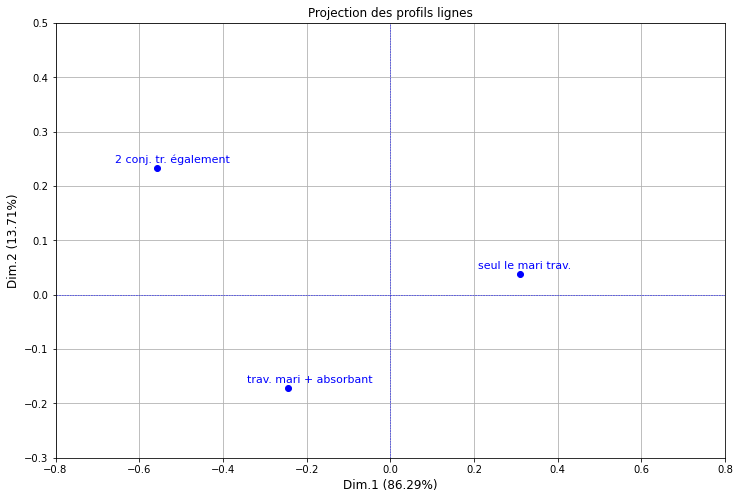

In [41]:
# Fonction de visualisation en 2D
def ca_plot(data,eigen,axei,axej,main,figsize=None):
    try:
        if axei==axej:
            raise ValueError('Erreur: axei doit être différent de axej.')
        elif axei>axej:
            raise ValueError('Erreur: axei doit être inférieur à axej.')
        elif axei<0 or axej<0:
            msg = 'Erreur: les valeurs des axes doivent être positives ou nulles.'
            raise ValueError(msg)
        else:
            # set limite
            n = data.shape[0]
            # Valeurs propres
            percent = np.array([100*x/sum(eigen) for x in eigen])
            dimi = round(percent[axei],2); dimj = round(percent[axej],2)

            # Graphique
            fig, axes = plt.subplots(figsize = figsize); axes.grid()
            axes.axis([-0.8,0.8,-0.3,0.5])
            axes.set_title(f"Projection des profils {main}",fontsize=12)
            axes.set_xlabel(f"Dim.{1+axei} ({dimi}%)",fontsize=12)
            axes.set_ylabel(f"Dim.{1+axej} ({dimj}%)",fontsize=12)
            for i in range(n):
                plt.scatter(data.iloc[i,axei], data.iloc[i,axej],
                            c = "blue", alpha = 1)
                axes.text(data.iloc[i,axei]-0.10,data.iloc[i,axej]+0.01,
                          data.index[i],color = "blue", fontsize = 11)
            plt.axhline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.axvline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.show()
            
    # if false then raise the value error
    except ValueError as e:
            print(e) 

# Nuage des profils lignes sur les axes 1 et 2
ca_plot(data=rowcoord,eigen=eigenvalue,axei=0,axej=1,
        main = 'lignes',figsize=(12,8))

In [42]:
# Coordonnées des profils colonnes
coordcol = pd.DataFrame(np.transpose(V[:fmax,:])*delta[:2],columns=index,
                        index = donnee.columns)
colcoord = coordcol.apply(lambda x : x/np.sqrt(colweight),axis=0)
colcoord.index.name='V2'
display(colcoord.T.round(3))

V2,rester au foyer,trav. à mi-temps,trav. plein temps
Dim.1,0.618,-0.004,-0.541
Dim.2,0.183,-0.100,0.189


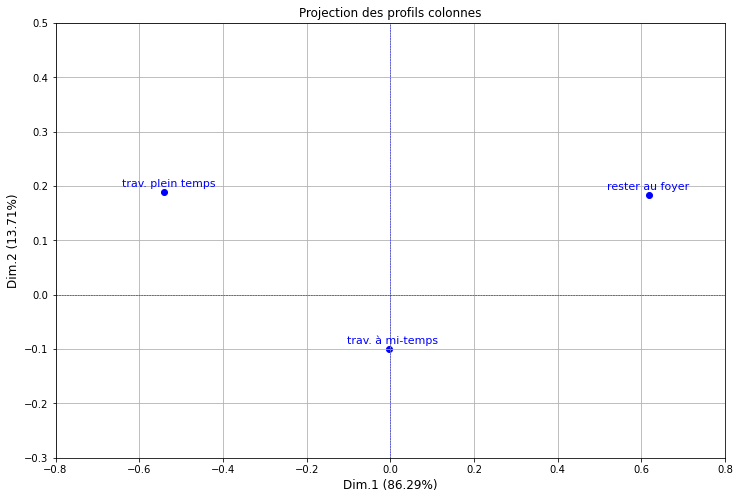

In [43]:
# Nuage des profils colonnes sur les axes 1 et 2
ca_plot(data=colcoord,eigen=eigenvalue,axei=0,axej=1,
        main = 'colonnes',figsize=(12,8))

In [44]:
# Relation de transition - Coordonnées profils lignes
transition1 = rowprof.dot(colcoord)/np.sqrt(eigenvalue)
display(transition1.iloc[:,[0,1]].T.round(3))

V1,2 conj. tr. également,trav. mari + absorbant,seul le mari trav.
Dim.1,-0.559,-0.244,0.310
Dim.2,0.233,-0.172,0.038


In [45]:
# Relation de transition - Coordonnées profils colonnes
transition2 =  colprof.T.dot(rowcoord)/np.sqrt(eigenvalue)
display(transition2.iloc[:,[0,1]].T.round(3))

V2,rester au foyer,trav. à mi-temps,trav. plein temps
Dim.1,0.618,-0.004,-0.541
Dim.2,0.183,-0.100,0.189


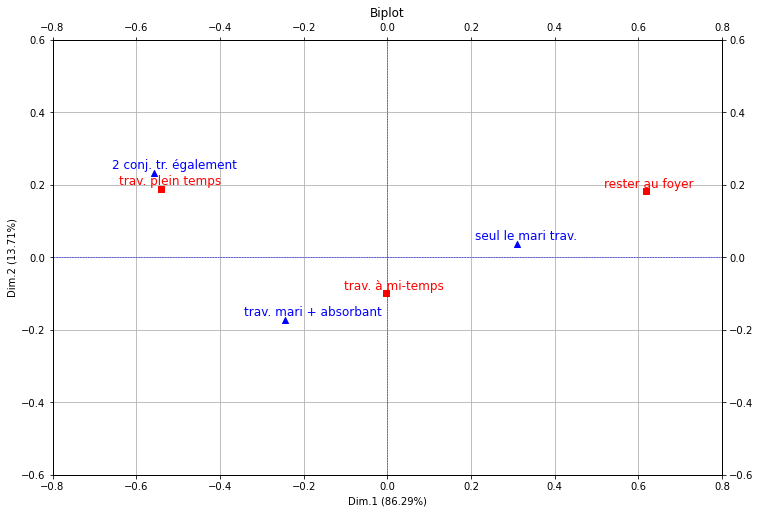

In [46]:
# Nuage simultané
def biplot(data1,data2,eigen,axei,axej,figsize=None):
    # Représentation simultanée des indvidus et des variables
    try:
        if axei==axej:
            raise ValueError('Erreur: axei doit être différent de axej.')
        elif axei>axej:
            raise ValueError('Erreur: axei doit être inférieur à axej.')
        elif axei<0 or axej<0:
            msg = 'Erreur: les valeurs des axes doivent être positives ou nulles.'
            raise ValueError(msg)
        else:
            n = data1.shape[0];p=data2.shape[0]
            # Valeurs propres
            percent = np.array([100*x/sum(eigen) for x in eigen])
            dimi = round(percent[axei],2); dimj = round(percent[axej],2)
            
            # Biplot
            fig = plt.figure(figsize=(12,8))
            axes1 = fig.add_subplot(111)
            axes2 = axes1.twiny()
            axes2 = axes2.twinx()
            axes1.grid()
            axes2.axis([-0.8,.8,-.6,0.6])
            axes1.axis([-0.8,.8,-.6,0.6])
            axes1.set_title("Biplot")
            axes1.set_xlabel(f"Dim.{1+axei} ({dimi}%)")
            axes1.set_ylabel(f"Dim.{1+axej} ({dimj}%)")
            # Affichage des individus
            for i in range(n):
                axes1.scatter(data1.iloc[i,0],data1.iloc[i,1],
                              c = "blue",alpha = 1,marker="^")
                axes1.text(data1.iloc[i,0]-0.10,data1.iloc[i,1]+0.01,
                           data1.index[i],color = "blue",fontsize=12)
            # Affichage des variables
            for k in range(p):
                axes2.scatter(data2.iloc[k,0],data2.iloc[k,1],
                              color='red',alpha=1,marker="s")
                axes2.text(data2.iloc[k,0]-0.10,data2.iloc[k,1]+0.01,
                           data2.index[k],color = "red",fontsize=12)
            plt.axhline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.axvline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.show()
            
    except ValueError as e:
            print(e)  

# Affichage
biplot(data1=rowcoord,data2=colcoord,eigen=eigenvalue,axei=0,axej=1,
       figsize=(10,10))

## Aide à l'interprétation

### Analyse des points lignes

#### Cosinus carré des points lignes

In [47]:
# Cosinus des modalités lignes
rowcos2 = rowcoord.apply(lambda x: x**2/rowdisto.values, axis = 0)
display(rowcos2.T.round(3))

V1,2 conj. tr. également,trav. mari + absorbant,seul le mari trav.
Dim.1,0.851,0.667,0.985
Dim.2,0.149,0.333,0.015


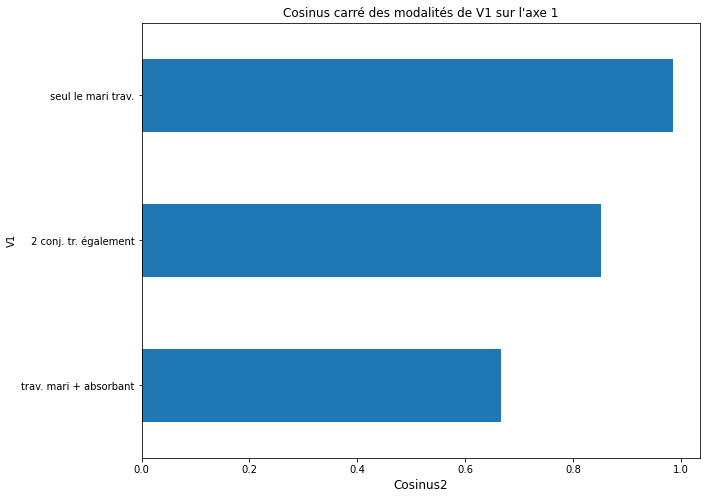

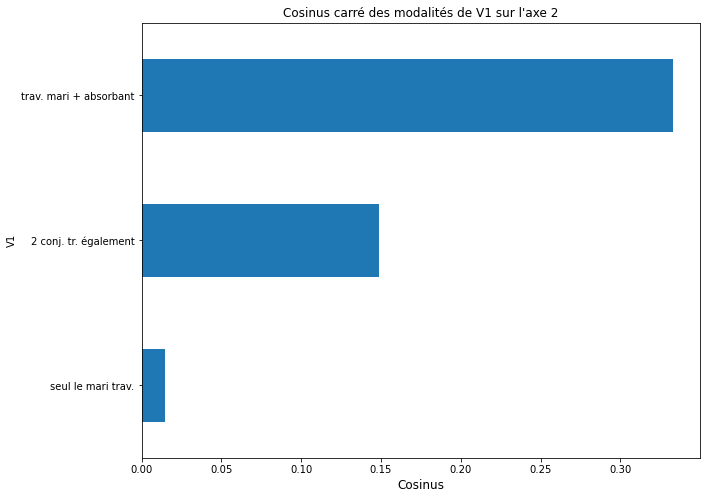

In [48]:
# Affichage graphique
def plot_graph(data,axis,xlabel,title,figsize=None):
    p = data.shape[1]
    try:
        if axis<0 or axis>p:
            raise ValueError(f'axis doit être compris entre {0} et {p-1}.')
        else:
            sort = data.sort_values(by=f'Dim.{1+axis}', ascending=True)
            sort.iloc[:,axis].plot.barh(figsize=figsize)
            plt.xlabel(xlabel,fontsize=12)
            plt.title(f"{title} sur l'axe {1+axis}",fontsize=12)
            plt.show()
    except ValueError as f:
        print(f)   
# Cosinus carré axe 1
plot_graph(data=rowcos2,axis=0,xlabel = 'Cosinus2',
           title = 'Cosinus carré des modalités de V1',figsize=(10,8))

# Cosinus carré axe 2
plot_graph(data=rowcos2,axis=1,xlabel = 'Cosinus',
           title = 'Cosinus carré des modalités de V1',figsize=(10,8))

#### Contribution des points lignes

In [49]:
# Contribution des modalités lignes
contrib = rowcoord.apply(lambda x: 100*x**2*rowprob,axis=0)
rowcontrib = contrib.apply(lambda x : x/eigenvalue, axis=1)
display(rowcontrib.T.round(3))

V1,2 conj. tr. également,trav. mari + absorbant,seul le mari trav.
Dim.1,40.432,16.371,43.197
Dim.2,44.429,51.436,4.135


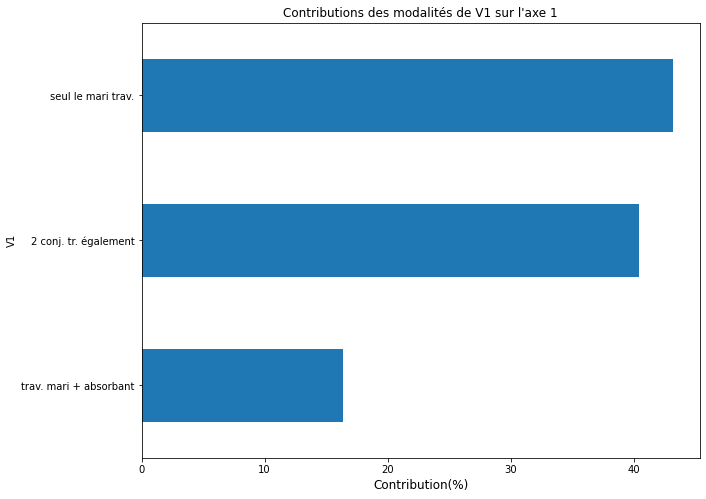

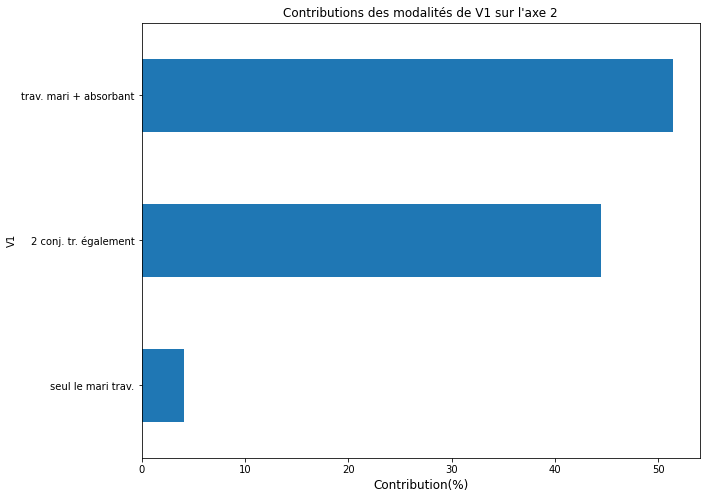

In [50]:
# Contribution axe 1
plot_graph(data=rowcontrib,axis=0,xlabel = 'Contribution(%)',
           title = 'Contributions des modalités de V1',figsize=(10,8))

# Contribution axe 2
plot_graph(data=rowcontrib,axis=1,xlabel = 'Contribution(%)',
           title = 'Contributions des modalités de V1',figsize=(10,8))

### Analyse des points colonnes

#### Cosinus carrés des points colonnes

In [51]:
# Cosinus carrés des points colonnes
colcos2 = colcoord.apply(lambda x:x**2/coldisto,axis = 0)
display(colcos2.T.round(3))

V2,rester au foyer,trav. à mi-temps,trav. plein temps
Dim.1,0.92,0.001,0.891
Dim.2,0.08,0.999,0.109


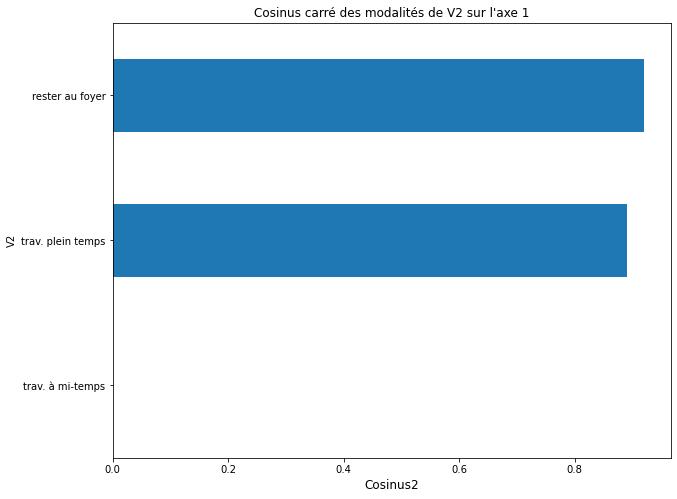

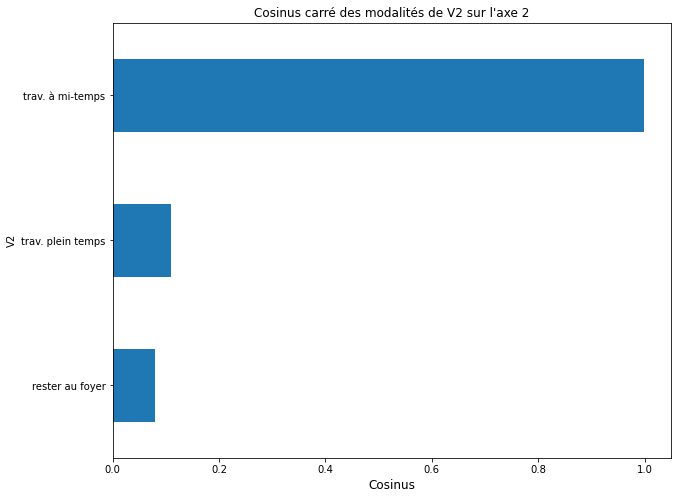

In [52]:
# Cosinus carré axe 1
plot_graph(data=colcos2,axis=0,xlabel = 'Cosinus2',
           title = 'Cosinus carré des modalités de V2',figsize=(10,8))

# Cosinus carré axe 2
plot_graph(data=colcos2,axis=1,xlabel = 'Cosinus',
           title = 'Cosinus carré des modalités de V2',figsize=(10,8))

#### Contribution des modalités colonnes

In [53]:
# Contribution des modalités colonnes
contrib2 = colcoord.apply(lambda x: 100*x**2*colprob,axis=0)
colcontrib = contrib2.apply(lambda x : x/eigenvalue, axis=1)
display(colcontrib.T.round(3))

V2,rester au foyer,trav. à mi-temps,trav. plein temps
Dim.1,53.913,0.007,46.079
Dim.2,29.613,34.853,35.533


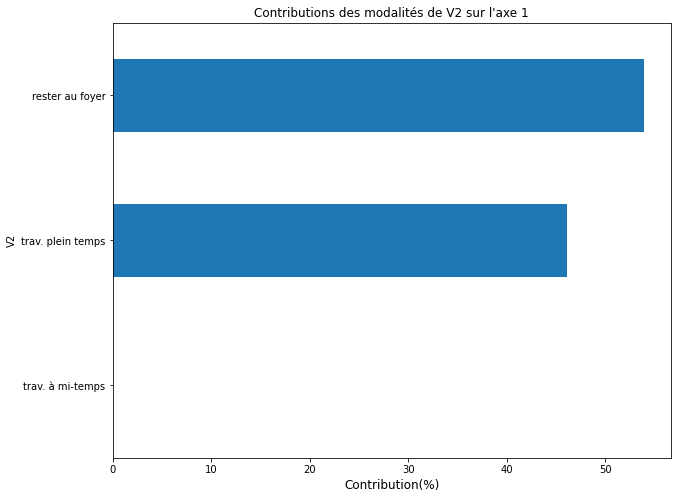

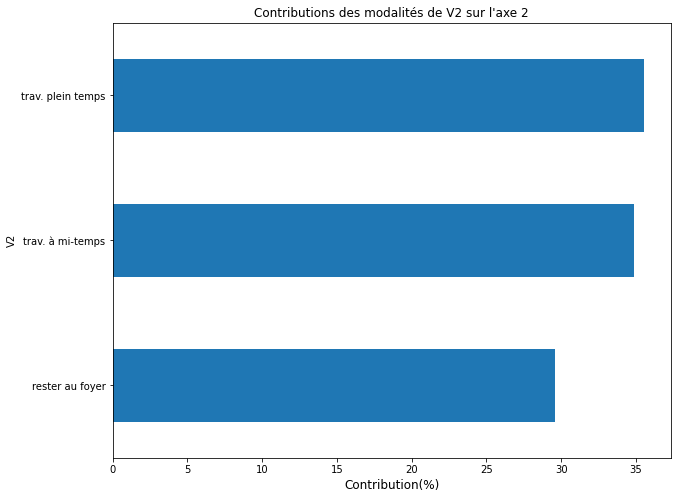

In [54]:
# Contribution axe 1
plot_graph(data=colcontrib,axis=0,xlabel = 'Contribution(%)',
           title = 'Contributions des modalités de V2',figsize=(10,8))

# Contribution axe 2
plot_graph(data=colcontrib,axis=1,xlabel = 'Contribution(%)',
           title = 'Contributions des modalités de V2',figsize=(10,8))

### Indicateurs 

In [55]:
# V de cramer
Vcramer = np.sqrt(inertietot/fmax)
print("V de Cramer vaut %.4f" %(Vcramer))

V de Cramer vaut 0.2602


In [56]:
# indicateurs de liaison
def VCramer(phi2,l,c):
    return (phi2/min(l-1,c-1))**(0.5)
 
def Tschuprow(phi2,l,c):
    return np.sqrt(phi2/np.sqrt((l-1)*(c-1)))
 
def mesure_liaison(data): 
    l,c = data.shape
    N = data.sum().sum()
    chi2, pvalue= stats.chi2_contingency(data)[0:2]
    phi2 = chi2/N
    V = VCramer(phi2,l,c)
    T = Tschuprow(phi2,l,c)
    df=pd.DataFrame({"phi-2":phi2,"khi-2":chi2,'p.value':pvalue,
                     "VCramer":V,"Tschuprow":T},index=['valeur'])
    df.index.name = 'Mesure'
    return df
indicateur = mesure_liaison(data=donnee)
display(indicateur.round(4))

,phi-2,khi-2,p.value,VCramer,Tschuprow
Mesure,,,,,
valeur,0.1354,233.4304,0.0,0.2602,0.2602


In [57]:
# Colonnes supplémentaires
donneesup = pd.read_csv('femme_travail.csv',delimiter=";",encoding =  "cp1252",
                     index_col = 0,usecols=[0,4,5,6,7])
display(donneesup)

,F foyer coupées du monde tout à fait d accord,F foyer coupées du monde plutôt d accord,F foyer coupées du monde pas très d accord,F foyer coupées du monde pas du tout d accord
2 conj. tr. également,107,75,40,39
trav. mari + absorbant,192,175,100,88
seul le mari trav.,140,215,254,299


In [58]:
# Liaison V1 et V3
liaisonV1_V3 = mesure_liaison(data=donneesup)
display(liaisonV1_V3.round(4))

,phi-2,khi-2,p.value,VCramer,Tschuprow
Mesure,,,,,
valeur,0.0941,162.1882,0.0,0.2169,0.196


In [59]:
# profil colonne supplémentaire
colsupprofil = donneesup.apply(lambda x:x/np.sum(x), axis=0)
display(colsupprofil.round(3))

,F foyer coupées du monde tout à fait d accord,F foyer coupées du monde plutôt d accord,F foyer coupées du monde pas très d accord,F foyer coupées du monde pas du tout d accord
2 conj. tr. également,0.244,0.161,0.102,0.092
trav. mari + absorbant,0.437,0.376,0.254,0.207
seul le mari trav.,0.319,0.462,0.645,0.702


In [60]:
# Coordonnées des colonnes supplémentaires
colsupcoord = colsupprofil.T.dot(rowcoord)/np.sqrt(eigenvalue)
colsupcoord.index.name='V3'
display(colsupcoord.round(3))

,Dim.1,Dim.2
V3,,
F foyer coupées du monde tout à fait d accord,-0.421,-0.046
F foyer coupées du monde plutôt d accord,-0.113,-0.070
F foyer coupées du monde pas très d accord,0.237,0.034
F foyer coupées du monde pas du tout d accord,0.339,0.092


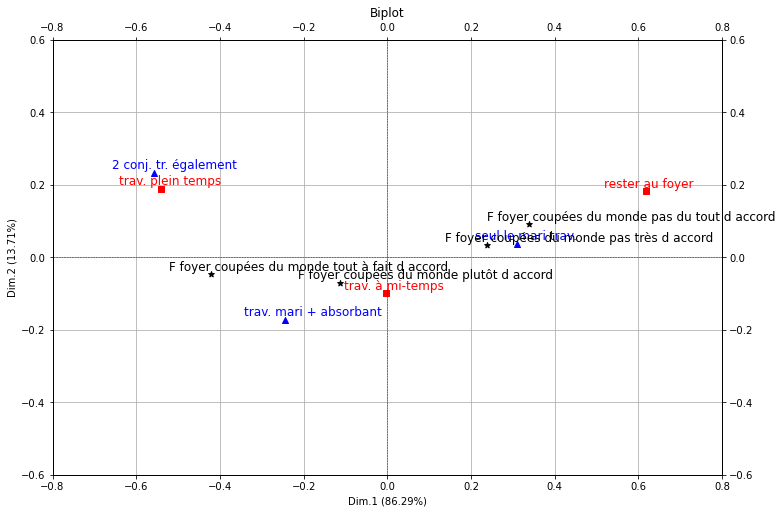

In [61]:
# Nuage simultané
def biplot2(data1,data2,data3,eigen,axei,axej,figsize=None):
    # Représentation simultanée des indvidus et des variables
    try:
        if axei==axej:
            raise ValueError('Erreur: axei doit être différent de axej.')
        elif axei>axej:
            raise ValueError('Erreur: axei doit être inférieur à axej.')
        elif axei<0 or axej<0:
            msg = 'Erreur: les valeurs des axes doivent être positives ou nulles.'
            raise ValueError(msg)
        else:
            n = data1.shape[0];p=data2.shape[0];q = data3.shape[0]
            # Valeurs propres
            percent = np.array([100*x/sum(eigen) for x in eigen])
            dimi = round(percent[axei],2); dimj = round(percent[axej],2)
            
            # Biplot
            fig = plt.figure(figsize=(12,8))
            axes1 = fig.add_subplot(111)
            axes2 = axes1.twiny()
            axes2 = axes2.twinx()
            axes1.grid()
            axes2.axis([-0.8,.8,-.6,0.6])
            axes1.axis([-0.8,.8,-.6,0.6])
            axes1.set_title("Biplot")
            axes1.set_xlabel(f"Dim.{1+axei} ({dimi}%)")
            axes1.set_ylabel(f"Dim.{1+axej} ({dimj}%)")
            # Affichage des individus
            for i in range(n):
                axes1.scatter(data1.iloc[i,axei],data1.iloc[i,axej],
                              c = "blue",alpha = 1,marker="^")
                axes1.text(data1.iloc[i,axei]-0.10,data1.iloc[i,axej]+0.01,
                           data1.index[i],color = "blue",fontsize=12)
            # Affichage des variables
            for k in range(p):
                axes2.scatter(data2.iloc[k,axei],data2.iloc[k,axej],
                              color='red',alpha=1,marker="s")
                axes2.text(data2.iloc[k,axei]-0.10,data2.iloc[k,axej]+0.01,
                           data2.index[k],color = "red",fontsize=12)
            for l in range(q):
                axes2.scatter(data3.iloc[l,axei],data3.iloc[l,axej],
                              color='black',alpha=1,marker="*")
                axes2.text(data3.iloc[l,axei]-0.10,data3.iloc[l,axej]+0.01,
                           data3.index[l],color = "black",fontsize=12)
            plt.axhline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.axvline(0, color='blue',linestyle="--", linewidth=0.5)
            plt.show()
            
    except ValueError as e:
            print(e)  

# Affichage
biplot2(data1=rowcoord,data2=colcoord,data3=colsupcoord,eigen=eigenvalue,
        axei=0,axej=1,figsize=(10,10))

In [62]:
display(pd.concat([rowinfos,rowcoord[['Dim.1','Dim.2']],rowcontrib[['Dim.1','Dim.2']],
           rowcos2[['Dim.1','Dim.2']]],axis=1).round(3))

,Disto2,poids,Inertie,Dim.1,Dim.2,Dim.1,Dim.2,Dim.1,Dim.2
V1,,,,,,,,,
2 conj. tr. également,0.367,0.151,0.055,-0.559,0.233,40.432,44.429,0.851,0.149
trav. mari + absorbant,0.089,0.322,0.029,-0.244,-0.172,16.371,51.436,0.667,0.333
seul le mari trav.,0.097,0.527,0.051,0.310,0.038,43.197,4.135,0.985,0.015


In [63]:
display(pd.concat([colinfos,colcoord[['Dim.1','Dim.2']],colcontrib[['Dim.1','Dim.2']],
           colcos2[['Dim.1','Dim.2']]],axis=1).round(3))

,Disto2,poids,Inertie,Dim.1,Dim.2,Dim.1,Dim.2,Dim.1,Dim.2
V2,,,,,,,,,
rester au foyer,0.416,0.165,0.068,0.618,0.183,53.913,29.613,0.920,0.080
trav. à mi-temps,0.010,0.651,0.006,-0.004,-0.100,0.007,34.853,0.001,0.999
trav. plein temps,0.329,0.184,0.060,-0.541,0.189,46.079,35.533,0.891,0.109
